In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import fetch_lfw_people

In [37]:
# #load the data
# data=fetch_olivetti_faces()
# data.keys()
data=fetch_lfw_people(min_faces_per_person=10)
data.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [38]:
#declare inputs, target and images
inputs=data.data
target=data.target
images=data.images
print(data.target)

[ 54   0 134 ...  98 136  29]


In [39]:
images.shape

(4324, 62, 47)

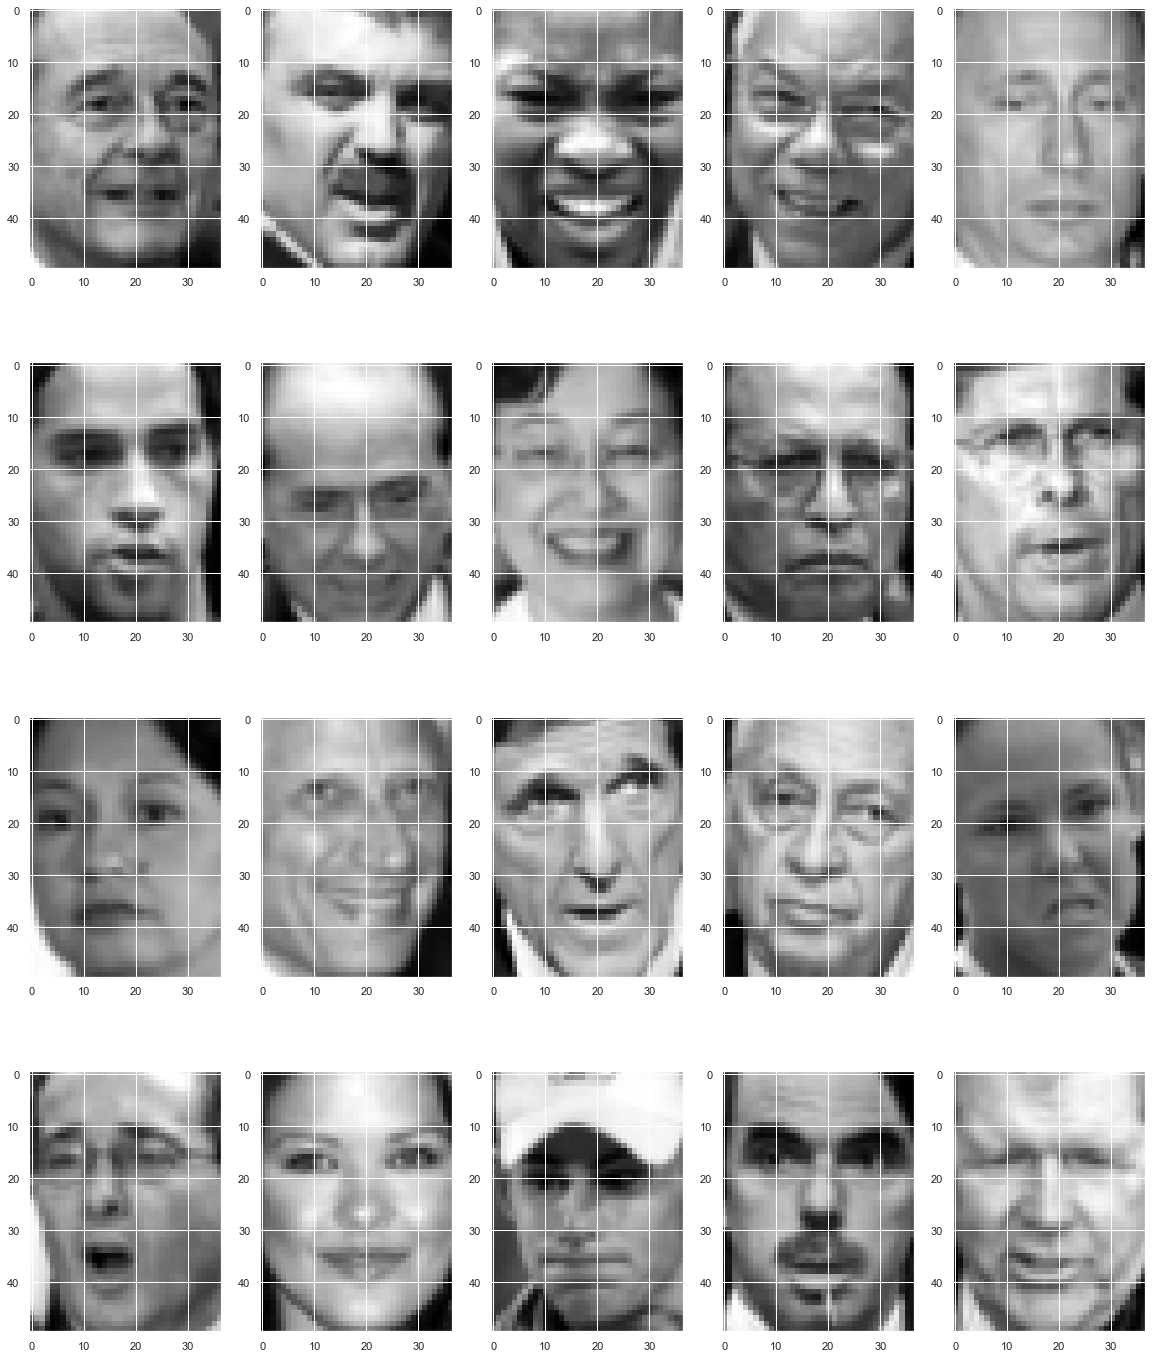

In [26]:
plt.figure(figsize=(20,25))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(data.images[i],cmap=plt.cm.gray)
plt.show()

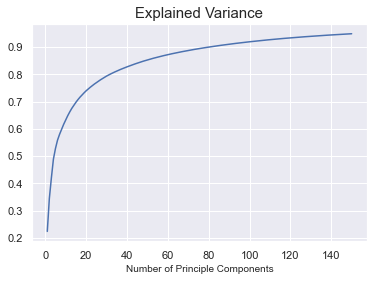

In [31]:
# import library
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# train test split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, random_state=365)
StandardScaler().fit(x_train)
StandardScaler().fit(x_test)
# PCA transformation and reduce the dimension from 4096 to 50
cmp=150
pca = PCA(n_components=cmp, whiten=True)
X_train = pca.fit_transform(x_train)

X_test = pca.transform(x_test)
plt.plot(range(1,cmp+1), pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance',fontsize=15)
plt.xlabel('Number of Principle Components', fontsize=10)
plt.show()

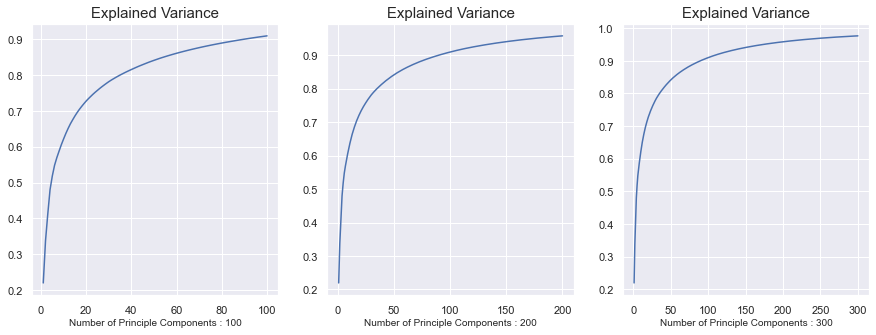

In [11]:
# create a function to plot line graph to compare ratio - Explained Variance changes with different n component
def EV(n):
    pca = PCA(n_components=n, whiten=True)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    #plot
    plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum())
    plt.title('Explained Variance',fontsize=15)
    plt.xlabel('Number of Principle Components : {}'.format(n), fontsize=10)
# use the function above and try use n_component=100,200,and 300
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
EV(100)
plt.subplot(1,3,2)
EV(200)
plt.subplot(1,3,3)
EV(300)


In [32]:
from sklearn import svm
# Credit to Flatiron School PCA lecture 
# fit the model
clf = svm.SVC(C=10, gamma=0.001)
%timeit clf.fit(X_train, y_train)
# obtian the accuracy
accuracy_train= clf.score(X_train, y_train)
accuracy_test= clf.score(X_test, y_test)
print('Accuracy - train data: {}'.format(accuracy_train))
print('Accuracy - test data : {}'.format( accuracy_test))
# prediction
test_pre=clf.predict(X_test)
train_pre=clf.predict(X_train)
# F1 _score
from sklearn.metrics import f1_score
f1_train=f1_score(y_train,train_pre,average='weighted')
f1_test=f1_score(y_test,test_pre,average='weighted')
f1=f1_train-f1_test
print("f1 score - test data  : {}" .format(f1))

5 s ± 61.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy - train data: 0.9839654640764725
Accuracy - test data : 0.5124884366327475
f1 score - test data  : 0.5106803861529756


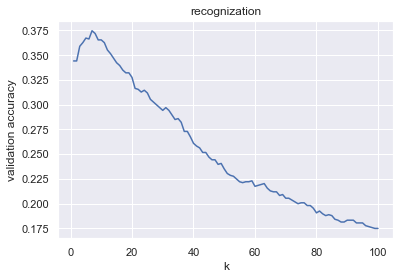

In [33]:
#knn 
from sklearn.neighbors import KNeighborsClassifier
def knn_test(X_train,X_test,y_test,y_train):
    accuracies=[]
    for k in range(1,101):
        classifier=KNeighborsClassifier(n_neighbors=k,weights="distance")#거리에 강세
        classifier.fit(X_train,y_train)
        accuracies.append(classifier.score(X_test,y_test))
    
    plt.plot(range(1,101),accuracies)
    plt.xlabel("k")
    plt.ylabel("validation accuracy")
    plt.title("recognization")
    plt.show()

knn_test(X_train,X_test,y_test,y_train)

In [34]:
#linear discriminant analysis -> LDA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
LDA.score(X_test,y_test)

0.5189639222941721